In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/Users/kunaldeshpande/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re

In [3]:
#importing data set

In [4]:
tub_train_data=pd.read_csv("/Users/kunaldeshpande/Desktop/Final Data/Experiments/19055288/19055288_training data.csv", delimiter=',', header=None, skiprows=1, names=['Make','Date','Series','Title','Person','Rating(Sell)','Weather','Shape','Cost'])

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
tub_train_data.head(50)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Cost
0,Cambs,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0
1,Cambs,23/06/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0
2,Cambs,23/06/2022,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0
3,Cambs,23/06/2022,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0
4,Cambs,23/06/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0
5,Cambs,23/06/2022,Frame,Mono Six Person,6.0,5.0,Sunny,Round,999.0
6,Cambs,23/06/2022,Urban,Rimba Six person,6.0,5.0,Sunny,Round,649.0
7,Cambs,23/06/2022,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,549.0
8,Cambs,23/06/2022,Premium,Camaro Four Person,4.0,5.0,Sunny,Round,649.0
9,Amazon,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,247.0


In [7]:
tub_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1005 non-null   object 
 1   Date          1005 non-null   object 
 2   Series        1005 non-null   object 
 3   Title         1005 non-null   object 
 4   Person        1005 non-null   float64
 5   Rating(Sell)  1005 non-null   float64
 6   Weather       1005 non-null   object 
 7   Shape         1005 non-null   object 
 8   Cost          1005 non-null   float64
dtypes: float64(3), object(6)
memory usage: 141.5+ KB


In [8]:
def cleanreg(x):
    reps = [['\s+$',''],['^\s+',''],['\s{2,}',' ']]
    for r in reps:
        x = re.sub(r[0],r[1],x)
    return x 

In [9]:
#tub_train_data['Title'] = tub_train_data['Title'].apply(lambda x: cleanreg(x))
#tub_train_data['Make'] = tub_train_data['Make'].apply(lambda x: cleanreg(x))
#tub_train_data['Date'] = tub_train_data['Date'].apply(lambda x: cleanreg(x))
#tub_train_data['Series'] = tub_train_data['Series'].apply(lambda x: cleanreg(x))
#tub_train_data['Weather'] = tub_train_data['Weather'].apply(lambda x: cleanreg(x))
#tub_train_data['Shape'] = tub_train_data['Shape'].apply(lambda x: cleanreg(x))
#'''Repeat this step for all text string columns'''

In [10]:
tub_train_data.dropna(inplace=True)

In [11]:
tub_train_data.shape

(1005, 9)

In [12]:
tub_train_data.isnull().sum()

Make            0
Date            0
Series          0
Title           0
Person          0
Rating(Sell)    0
Weather         0
Shape           0
Cost            0
dtype: int64

In [13]:
tub_train_data["Sell_Date"] = pd.to_datetime(tub_train_data.Date, format="%d/%m/%Y").dt.day

In [14]:
tub_train_data["Sell_month"] = pd.to_datetime(tub_train_data["Date"], format = "%d/%m/%Y").dt.month

In [15]:
tub_train_data.head(50)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0,23,6
1,Cambs,23/06/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0,23,6
2,Cambs,23/06/2022,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0,23,6
3,Cambs,23/06/2022,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0,23,6
4,Cambs,23/06/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0,23,6
5,Cambs,23/06/2022,Frame,Mono Six Person,6.0,5.0,Sunny,Round,999.0,23,6
6,Cambs,23/06/2022,Urban,Rimba Six person,6.0,5.0,Sunny,Round,649.0,23,6
7,Cambs,23/06/2022,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,549.0,23,6
8,Cambs,23/06/2022,Premium,Camaro Four Person,4.0,5.0,Sunny,Round,649.0,23,6
9,Amazon,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,247.0,23,6


In [16]:
tub_train_data.drop(["Date"], axis = 1, inplace = True)

In [17]:
tub_train_data.head(15)

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0,23,6
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0,23,6
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0,23,6
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0,23,6
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0,23,6
5,Cambs,Frame,Mono Six Person,6.0,5.0,Sunny,Round,999.0,23,6
6,Cambs,Urban,Rimba Six person,6.0,5.0,Sunny,Round,649.0,23,6
7,Cambs,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,549.0,23,6
8,Cambs,Premium,Camaro Four Person,4.0,5.0,Sunny,Round,649.0,23,6
9,Amazon,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,247.0,23,6


In [18]:
tub_train_data["Make"].value_counts()

Amazon    240
Mspa      215
Cambs     155
Frono     145
GSD       130
Alice     120
Name: Make, dtype: int64

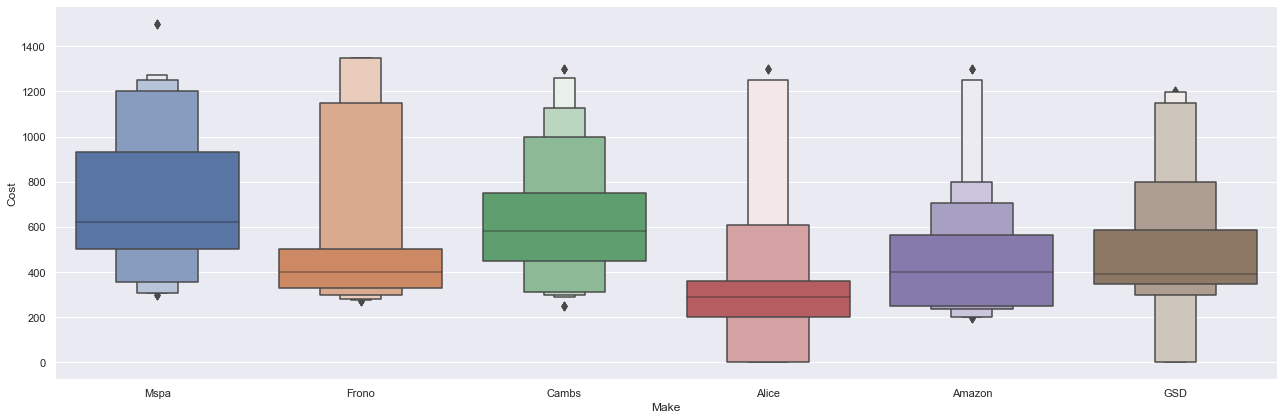

In [19]:


# Cost vs Make
sns.catplot(y = "Cost", x = "Make", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [20]:
# As is Nominal Categorical data we will perform OneHotEncoding

Make = tub_train_data[["Make"]]

Make = pd.get_dummies(Make, drop_first= False)

Make.head(50)

,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0


In [21]:
tub_train_data["Title"].value_counts()

Bergen Four Person          85
Bergen Six Person           85
Tekapo Six person           80
Mono Six Person             80
Rimba Six person            80
Ottomon Six person          80
Tekapo Four person          75
Tuscany Six Person          75
Camaro Four Person          65
Lite six person             55
Lite Four Person            45
Nest Two Person             35
Otium Six Person            20
Carlton Six person          20
Soho Six Person             20
Aurora Six Person           15
Vito Six Person             15
Silver Cloud Six Person     15
Silver Cloud Four person    15
Exotic Four Person          10
Ottomon Four Person         10
Exotic Six Person           10
Camaro Six Person           10
Starry Six Person            5
Name: Title, dtype: int64

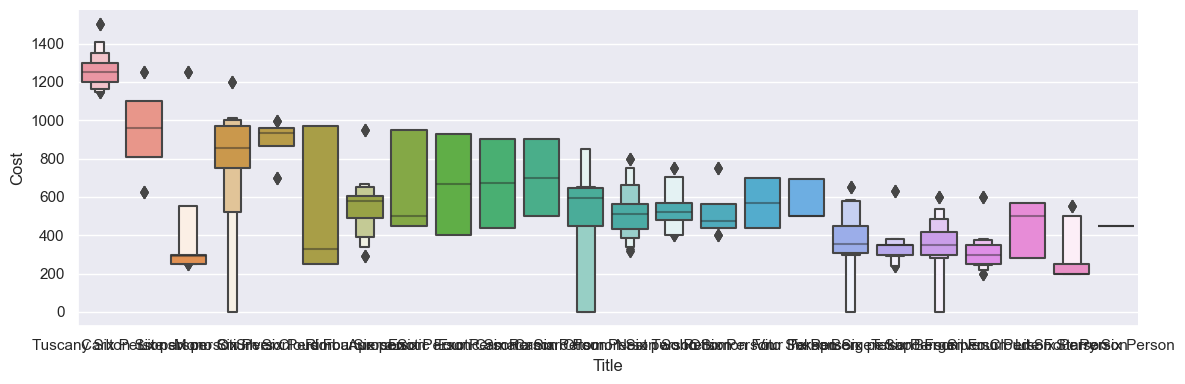

In [22]:
# Title vs Price

sns.catplot(y = "Cost", x = "Title", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [23]:

Title = tub_train_data[["Title"]]

Title = pd.get_dummies(Title, drop_first= True)

Title.head()

,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
tub_train_data["Series"].value_counts()

Comfort    430
Frame      155
Urban      155
Premium    115
Lite        80
Muse        40
Delight     30
Name: Series, dtype: int64

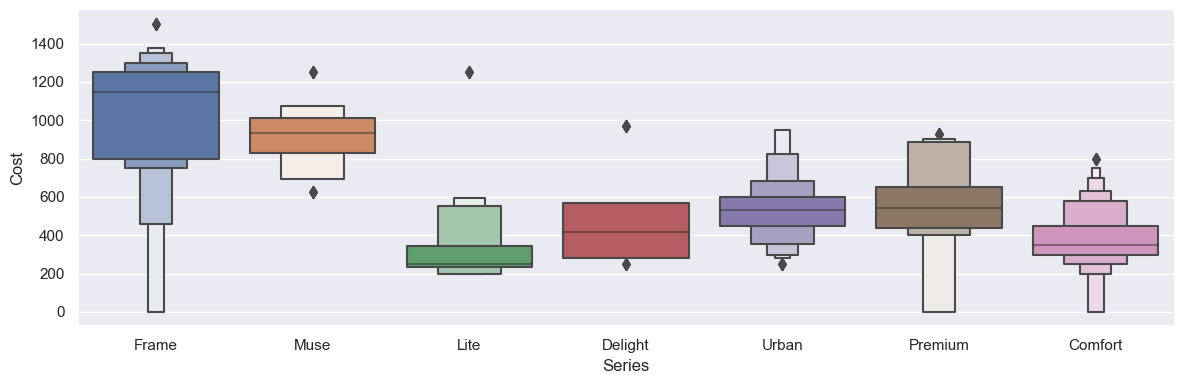

In [25]:
# Series vs Price

sns.catplot(y = "Cost", x = "Series", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
# As Series  is Nominal Categorical data we will perform OneHotEncoding

Series =tub_train_data[["Series"]]

Series = pd.get_dummies(Series, drop_first= False)

Series.head()

,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [27]:

tub_train_data.replace({"Sunny":3, "cloudy":0, "Cloudy": 1, "Dry": 2, "Round":3, "Square":5, "Square Round":6, "Square round":7}, inplace = True)

In [28]:
tub_train_data.head(20)

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,3,5,299.0,23,6
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,3,5,350.0,23,6
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,3,3,579.0,23,6
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,3,3,499.0,23,6
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,3,3,1299.0,23,6
5,Cambs,Frame,Mono Six Person,6.0,5.0,3,3,999.0,23,6
6,Cambs,Urban,Rimba Six person,6.0,5.0,3,3,649.0,23,6
7,Cambs,Comfort,Ottomon Six person,6.0,4.0,3,3,549.0,23,6
8,Cambs,Premium,Camaro Four Person,4.0,5.0,3,3,649.0,23,6
9,Amazon,Comfort,Bergen Four Person,4.0,2.0,3,5,247.0,23,6


In [29]:


tub_data_train = pd.concat([tub_train_data, Make, Title, Series], axis = 1)

In [30]:
tub_data_train.head()

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,3,5,299.0,23,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,3,5,350.0,23,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,3,3,579.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,3,3,499.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,3,3,1299.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [31]:
tub_data_train.drop(["Make", "Title", "Series"], axis = 1, inplace = True)

In [32]:
tub_data_train.head()

,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,4.0,2.0,3,5,299.0,23,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.0,3.0,3,5,350.0,23,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6.0,3.0,3,3,579.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4.0,3.0,3,3,499.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6.0,5.0,3,3,1299.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [33]:
tub_data_train.shape

(1005, 43)

In [34]:
##TEST DATA

In [35]:
tub_test_data=pd.read_csv("/Users/kunaldeshpande/Desktop/Final Data/Experiments/19055288/19055288_testdata.csv", delimiter=',', header=None, skiprows=1, names=['Make','Date','Series','Title','Person','Rating(Sell)','Weather','Shape'])

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
tub_test_data.head(50)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round
5,Amazon,12/09/2022,Comfort,Ottomon Four Person,4,4,Cloudy,Round
6,Amazon,12/09/2022,Frame,Mono Six Person,6,5,Cloudy,Round
7,Amazon,12/09/2022,Urban,Rimba Six person,6,5,Cloudy,Round
8,Amazon,12/09/2022,Urban,Nest Two Person,2,5,Cloudy,Square Round
9,Amazon,12/09/2022,Urban,Vito Six Person,6,5,Cloudy,Square round


In [38]:
tub_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          302 non-null    object
 1   Date          302 non-null    object
 2   Series        302 non-null    object
 3   Title         302 non-null    object
 4   Person        302 non-null    int64 
 5   Rating(Sell)  302 non-null    int64 
 6   Weather       302 non-null    object
 7   Shape         302 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.0+ KB


In [39]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [40]:
tub_test_data.shape


(302, 8)

In [41]:
tub_test_data.dropna(inplace=False)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round
...,...,...,...,...,...,...,...,...
297,Amazon,23/09/2022,Urban,Rimba Six person,6,5,Cloudy,Round
298,Amazon,23/09/2022,Urban,Nest Two Person,2,5,Cloudy,Square Round
299,Amazon,23/09/2022,Urban,Vito Six Person,6,5,Cloudy,Square round
300,GSD,23/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round


In [42]:
tub_test_data.shape

(302, 8)

In [43]:
tub_test_data.head()

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round


In [44]:
tub_test_data.isnull().sum()

Make            0
Date            0
Series          0
Title           0
Person          0
Rating(Sell)    0
Weather         0
Shape           0
dtype: int64

In [45]:
tub_test_data.head()

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round


In [46]:
tub_test_data["Sell_Date"] = pd.to_datetime(tub_test_data.Date, format="%d/%m/%Y").dt.day

In [47]:
tub_test_data["Sell_month"] = pd.to_datetime(tub_test_data["Date"], format = "%d/%m/%Y").dt.month

In [48]:
tub_test_data.head(15)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round,12,9
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round,12,9
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square,12,9
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square,12,9
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round,12,9
5,Amazon,12/09/2022,Comfort,Ottomon Four Person,4,4,Cloudy,Round,12,9
6,Amazon,12/09/2022,Frame,Mono Six Person,6,5,Cloudy,Round,12,9
7,Amazon,12/09/2022,Urban,Rimba Six person,6,5,Cloudy,Round,12,9
8,Amazon,12/09/2022,Urban,Nest Two Person,2,5,Cloudy,Square Round,12,9
9,Amazon,12/09/2022,Urban,Vito Six Person,6,5,Cloudy,Square round,12,9


In [49]:
tub_test_data.drop(["Date"], axis = 1, inplace = True)
tub_test_data.head(15)


,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,Comfort,Bergen Six Person,6,3,Cloudy,Round,12,9
1,Amazon,Comfort,Bergen Four Person,4,3,Cloudy,Round,12,9
2,Amazon,Comfort,Tekapo Six person,6,1,Cloudy,Square,12,9
3,Amazon,Comfort,Tekapo Four person,4,1,Cloudy,Square,12,9
4,Amazon,Comfort,Ottomon Six person,6,4,Cloudy,Round,12,9
5,Amazon,Comfort,Ottomon Four Person,4,4,Cloudy,Round,12,9
6,Amazon,Frame,Mono Six Person,6,5,Cloudy,Round,12,9
7,Amazon,Urban,Rimba Six person,6,5,Cloudy,Round,12,9
8,Amazon,Urban,Nest Two Person,2,5,Cloudy,Square Round,12,9
9,Amazon,Urban,Vito Six Person,6,5,Cloudy,Square round,12,9


In [50]:
tub_test_data["Make"].value_counts()

Amazon    111
Mspa       72
Cambs      36
Frono      34
GSD        31
Alice      18
Name: Make, dtype: int64

In [51]:
# As is Nominal Categorical data we will perform OneHotEncoding

Make = tub_test_data[["Make"]]

Make = pd.get_dummies(Make, drop_first= False)

Make.head()

,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [52]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [53]:
# As Title is Nominal Categorical data we will perform OneHotEncoding

Title = tub_test_data[["Title"]]

Title = pd.get_dummies(Title, drop_first= False)

Title.head()

,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [55]:
tub_test_data["Series"].value_counts()

Comfort    103
Lite        48
Urban       46
Premium     39
Frame       24
Muse        24
Delight     18
Name: Series, dtype: int64

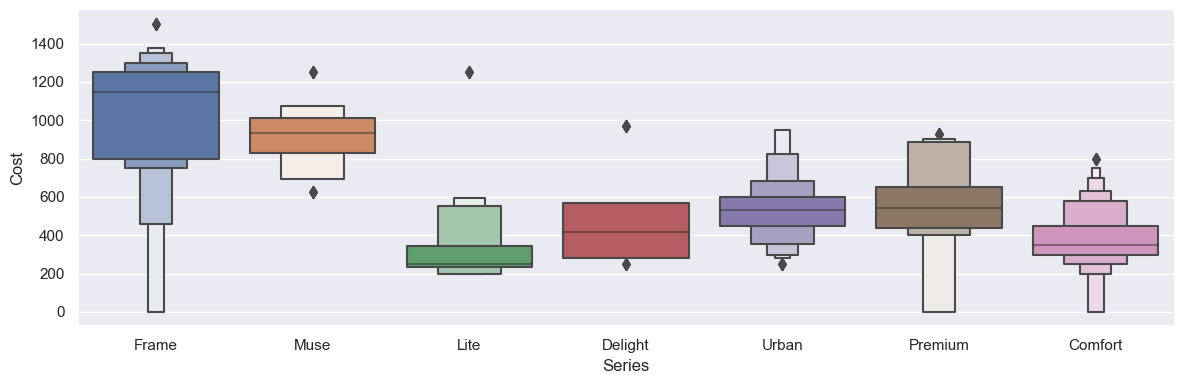

In [56]:
# Series vs Price

sns.catplot(y = "Cost", x = "Series", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [57]:

Series =tub_test_data[["Series"]]

Series = pd.get_dummies(Series, drop_first= False)

Series.head()

,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [58]:

# Here Values are assigned with corresponding keys
#automate thinking

tub_test_data.replace({"Sunny": 0,"cloudy":0, "Cloudy": 1, "Dry": 2, "Round":3, "Square":5, "Square Round":6, "Square round":7}, inplace = True)

In [59]:
tub_test_data.head()

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,Comfort,Bergen Six Person,6,3,1,3,12,9
1,Amazon,Comfort,Bergen Four Person,4,3,1,3,12,9
2,Amazon,Comfort,Tekapo Six person,6,1,1,5,12,9
3,Amazon,Comfort,Tekapo Four person,4,1,1,5,12,9
4,Amazon,Comfort,Ottomon Six person,6,4,1,3,12,9


In [60]:


tub_data_test = pd.concat([tub_test_data, Make, Title, Series], axis = 1)

In [61]:
tub_data_test

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,Amazon,Comfort,Bergen Six Person,6,3,1,3,12,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Amazon,Comfort,Bergen Four Person,4,3,1,3,12,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Amazon,Comfort,Tekapo Six person,6,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,Amazon,Comfort,Tekapo Four person,4,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,Amazon,Comfort,Ottomon Six person,6,4,1,3,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Amazon,Urban,Rimba Six person,6,5,1,3,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
298,Amazon,Urban,Nest Two Person,2,5,1,6,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
299,Amazon,Urban,Vito Six Person,6,5,1,7,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
300,GSD,Comfort,Bergen Four Person,4,3,1,3,23,9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [62]:
tub_data_test.drop(["Make", "Title", "Series"], axis = 1, inplace = True)
tub_data_test.head()


,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,6,3,1,3,12,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,3,1,3,12,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6,4,1,3,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
tub_data_test.shape

(302, 42)

In [64]:
tub_data_test.columns

Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_Date', 'Sell_month',
       'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono', 'Make_GSD',
       'Make_Mspa', 'Title_Bergen Four Person', 'Title_Bergen Six Person',
       'Title_Camaro Four Person', 'Title_Camaro Six Person',
       'Title_Carlton Six person', 'Title_Exotic Four Person',
       'Title_Exotic Six Person', 'Title_Lite Four Person',
       'Title_Lite six person', 'Title_Mono Six Person',
       'Title_Nest Two Person', 'Title_Otium Six Person',
       'Title_Ottomon Four Person', 'Title_Ottomon Six person',
       'Title_Rimba Six person', 'Title_Silver Cloud Four person',
       'Title_Silver Cloud Six Person', 'Title_Soho Six Person',
       'Title_Starry Six Person', 'Title_Tekapo Four person',
       'Title_Tekapo Six person', 'Title_Tuscany Six Person',
       'Title_Vito Six Person', 'Series_Comfort', 'Series_Delight',
       'Series_Frame', 'Series_Lite', 'Series_Muse', 'Series_Premium',
       'Se

In [65]:
#Feature Selection

#Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

#**heatmap**
#**feature_importance_**
#**SelectKBest**

In [66]:
tub_data_train.shape


(1005, 43)

In [67]:
tub_data_train.columns



Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Cost', 'Sell_Date',
       'Sell_month', 'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono',
       'Make_GSD', 'Make_Mspa', 'Title_Bergen Four Person',
       'Title_Bergen Six Person', 'Title_Camaro Four Person',
       'Title_Camaro Six Person', 'Title_Carlton Six person',
       'Title_Exotic Four Person', 'Title_Exotic Six Person',
       'Title_Lite Four Person', 'Title_Lite six person',
       'Title_Mono Six Person', 'Title_Nest Two Person',
       'Title_Otium Six Person', 'Title_Ottomon Four Person',
       'Title_Ottomon Six person', 'Title_Rimba Six person',
       'Title_Silver Cloud Four person', 'Title_Silver Cloud Six Person',
       'Title_Soho Six Person', 'Title_Starry Six Person',
       'Title_Tekapo Four person', 'Title_Tekapo Six person',
       'Title_Tuscany Six Person', 'Title_Vito Six Person', 'Series_Comfort',
       'Series_Delight', 'Series_Frame', 'Series_Lite', 'Series_Muse',
       'Series_Premi

In [68]:
X = tub_data_train.loc[:,['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_Date',
       'Sell_month', 'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono',
       'Make_GSD', 'Make_Mspa', 'Title_Bergen Four Person',
       'Title_Bergen Six Person', 'Title_Camaro Four Person',
       'Title_Camaro Six Person', 'Title_Carlton Six person',
       'Title_Exotic Four Person', 'Title_Exotic Six Person',
       'Title_Lite Four Person', 'Title_Lite six person',
       'Title_Mono Six Person', 'Title_Nest Two Person',
       'Title_Otium Six Person', 'Title_Ottomon Four Person',
       'Title_Ottomon Six person', 'Title_Rimba Six person',
       'Title_Silver Cloud Four person', 'Title_Silver Cloud Six Person',
       'Title_Soho Six Person', 'Title_Starry Six Person',
       'Title_Tekapo Four person', 'Title_Tekapo Six person',
       'Title_Tuscany Six Person', 'Title_Vito Six Person', 'Series_Comfort',
       'Series_Delight', 'Series_Frame', 'Series_Lite', 'Series_Muse',
       'Series_Premium', 'Series_Urban']]
X.head()

,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,4.0,2.0,3,5,23,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.0,3.0,3,5,23,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6.0,3.0,3,3,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4.0,3.0,3,3,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6.0,5.0,3,3,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [69]:
X.shape

(1005, 42)

In [70]:
y = tub_data_train.iloc[:, 4]
y.head()

0     299.0
1     350.0
2     579.0
3     499.0
4    1299.0
Name: Cost, dtype: float64

In [71]:
y.shape

(1005,)

/var/folders/lq/x__jtmnd7q5178b8wcfcq7780000gn/T/ipykernel_13902/3008998122.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tub_train_data.corr(), annot = True, cmap = "RdYlGn")


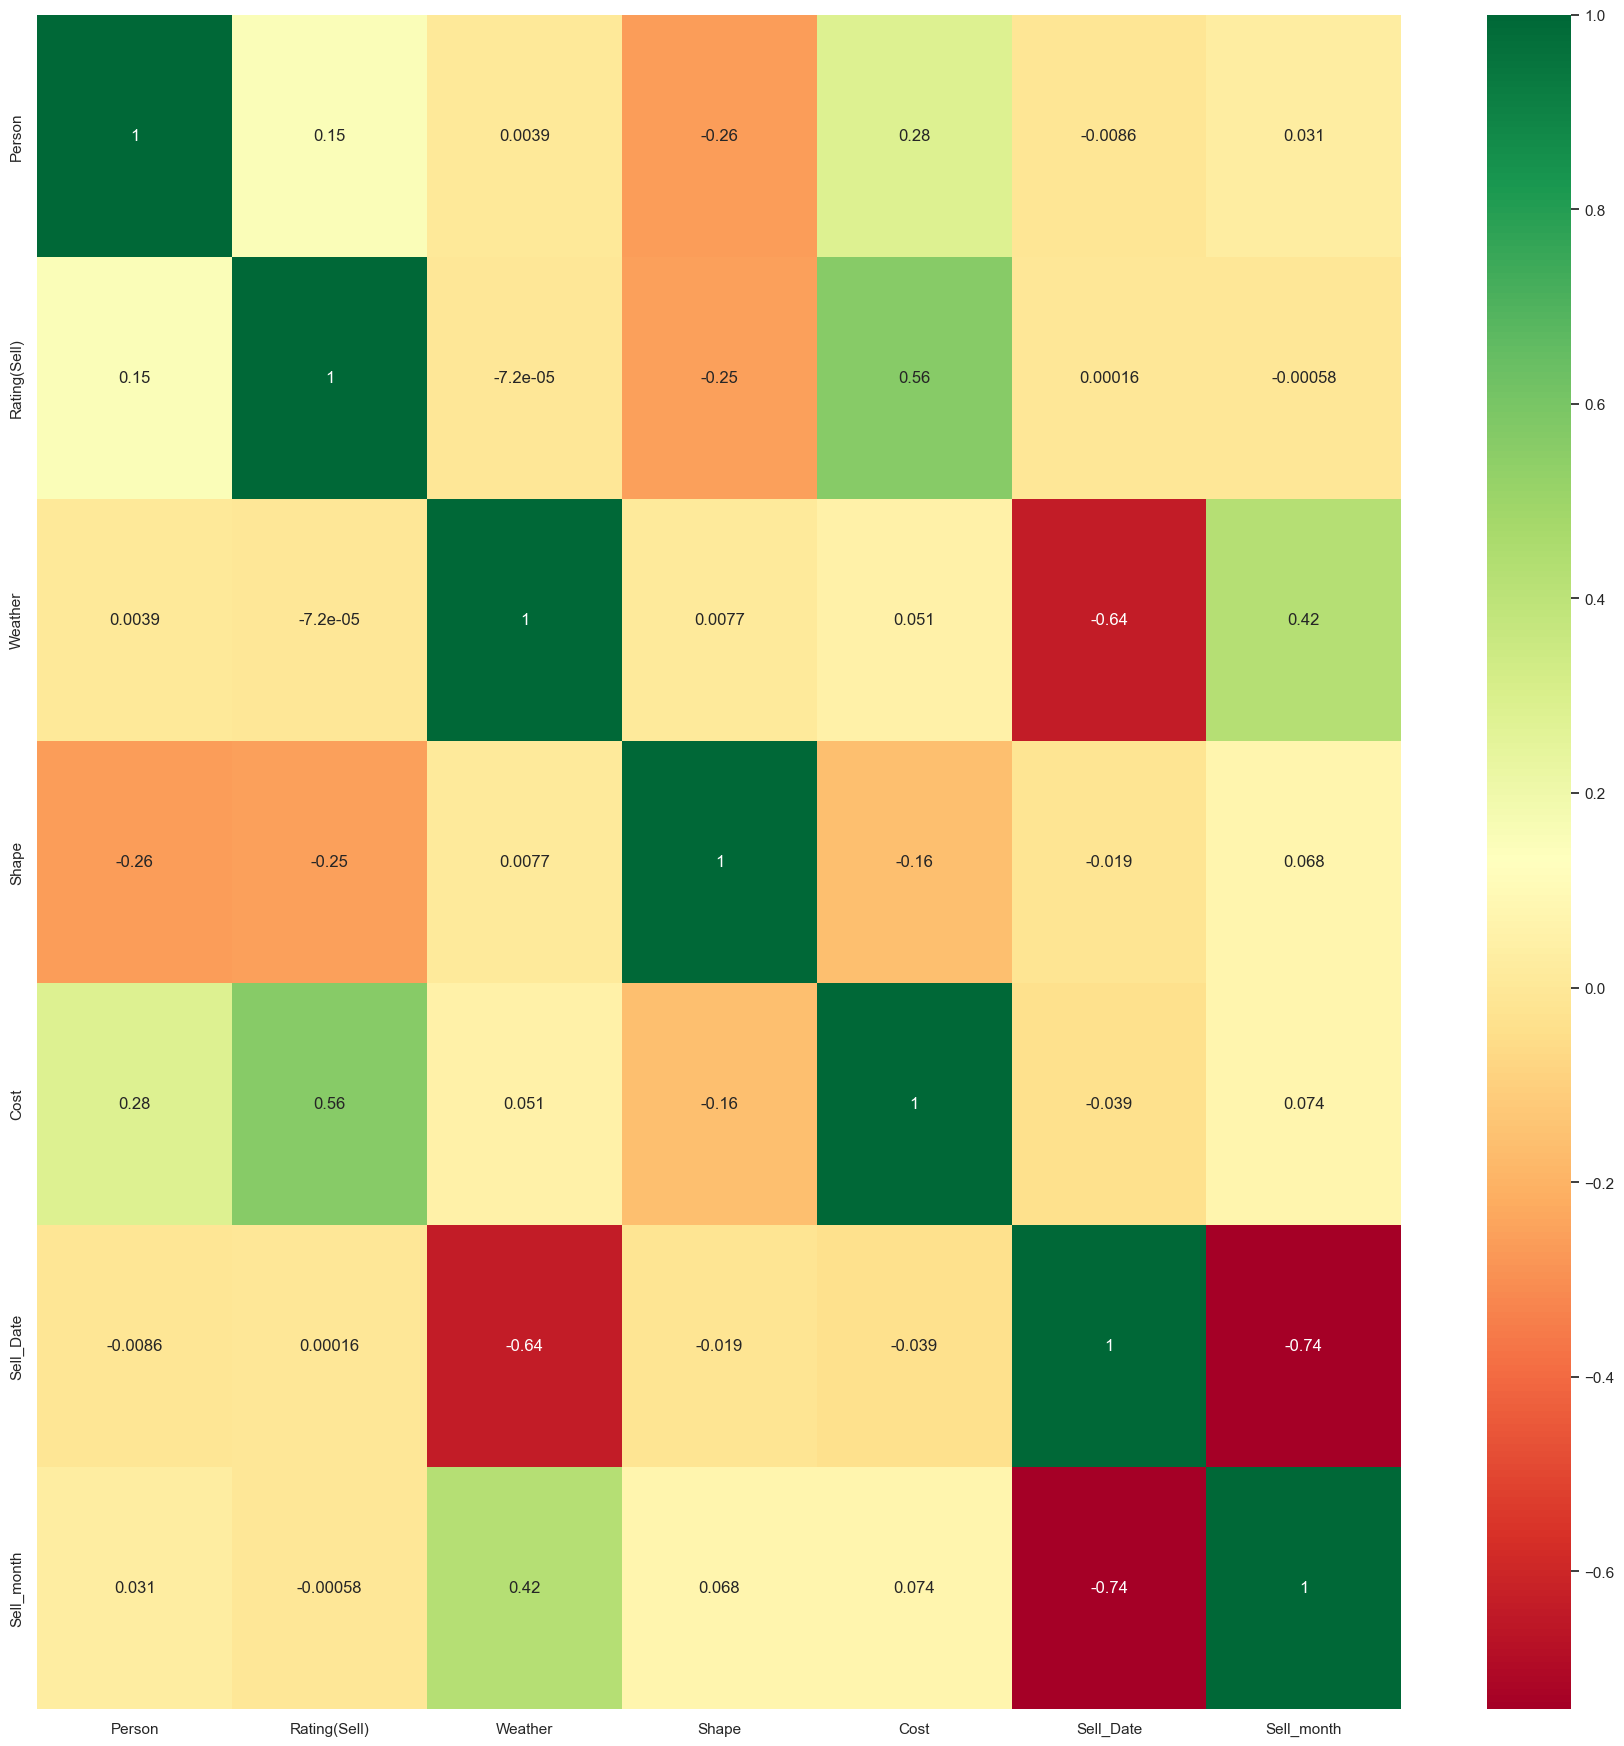

In [72]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (22,22))
sns.heatmap(tub_train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [73]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
feature_selection = ExtraTreesRegressor()
feature_selection.fit(X, y)

ExtraTreesRegressor()

In [74]:
print(feature_selection.feature_importances_)

[5.44868677e-03 1.07893194e-01 3.36730874e-03 1.61418707e-02
 8.23998509e-03 3.31319546e-02 5.32044100e-02 9.73846121e-03
 3.59246910e-02 7.80459346e-03 1.35224167e-02 8.00790136e-02
 2.15670037e-03 2.25598602e-03 7.53296158e-03 1.29318582e-03
 8.28574350e-03 4.75212203e-05 4.08649346e-05 3.73768455e-03
 7.75046552e-03 1.64783421e-02 8.56742613e-04 4.53347477e-04
 6.93958204e-04 8.38420341e-03 3.20153492e-03 1.74191596e-03
 3.55545446e-03 2.61328717e-03 3.68659366e-04 3.83610933e-03
 5.38731357e-03 4.22027249e-01 1.42425336e-04 4.42371004e-02
 2.15042323e-03 2.29005614e-02 1.10723103e-02 2.63088594e-02
 8.49202408e-03 7.50047890e-03]


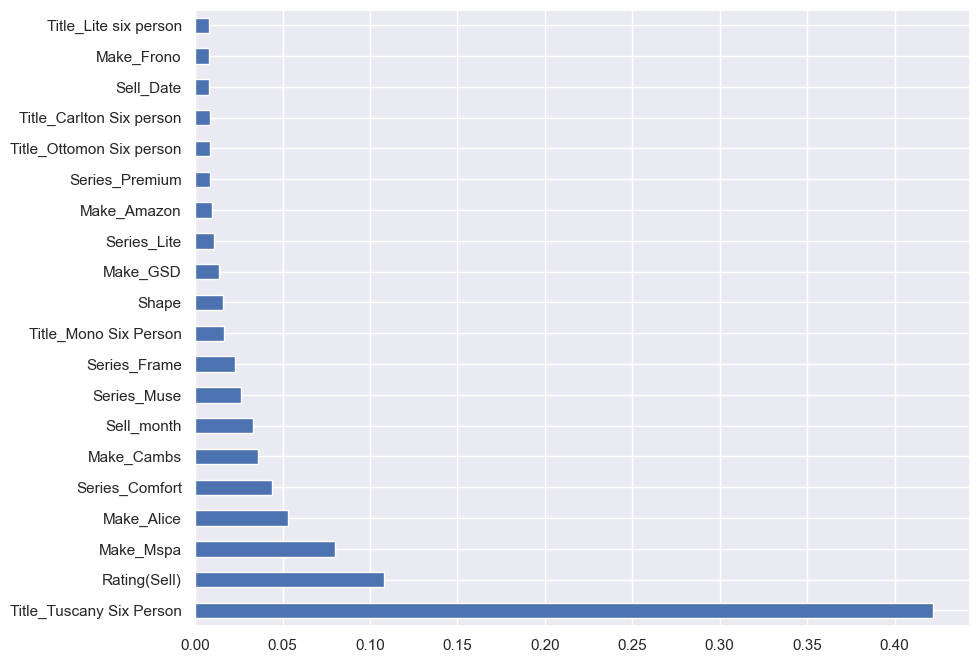

In [75]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (10,8))
feat_importances = pd.Series(feature_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [76]:
#Fitting model using Random Forest

#Split dataset into train and test set in order to prediction w.r.t X_test
#If needed do scaling of data
##Scaling is not done in Random forest
#Import model
#Fit the data
#Predict w.r.t X_test
#In regression check RSME Score
#Plot graph

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 0)

In [78]:
from sklearn.ensemble import RandomForestRegressor
regression_rf = RandomForestRegressor()
regression_rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = regression_rf.predict(X_test)


In [80]:
regression_rf.score(X_train, y_train)

0.9947852795669606

In [81]:
regression_rf.score(X_test, y_test)

0.9771561279372244

/Users/kunaldeshpande/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cost', ylabel='Density'>

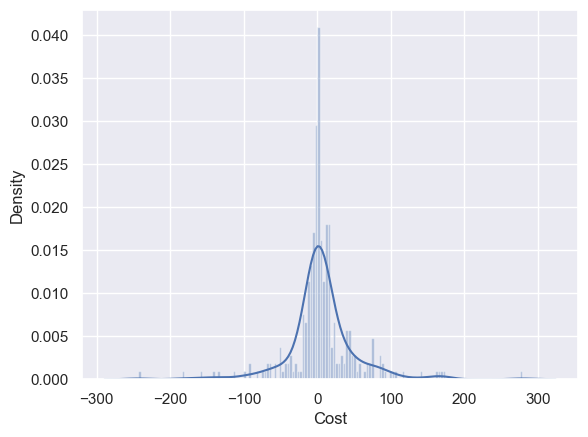

In [82]:
#sns.distplot(y_test-y_pred)
#plt.show()
sns.distplot(y_test-y_pred,bins=150,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,)


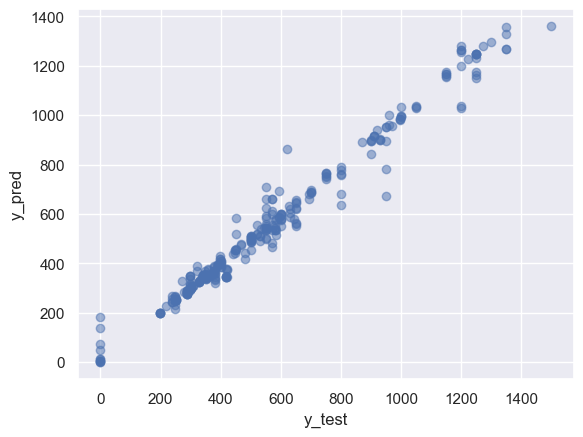

In [83]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
from sklearn import metrics

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.084928997161736
Mean Squared Error: 2284.183338974881
Root Mean Squared Error: 47.79313066722958


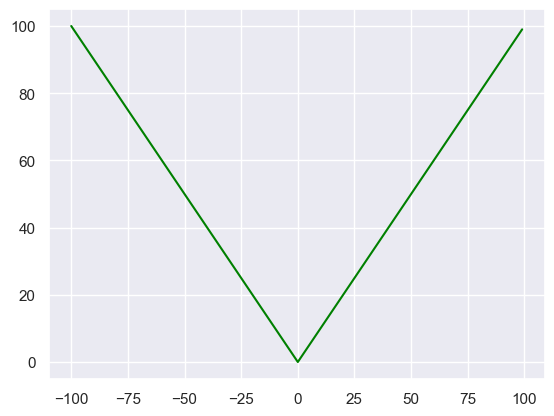

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  8

In [86]:

#plotting mean absolute error
#X as axes
#y_mean_absoloute_error is y_mae

from matplotlib import pyplot as plt
#MAE
x_axes = np.arange(-100, 100, 1)
y_mean_absolute_error= np.abs(x_axes)

plt.plot(x_axes, y_mean_absolute_error, "green")
plt.grid(True, which="both")
plt.show()

y_mean_absolute_error

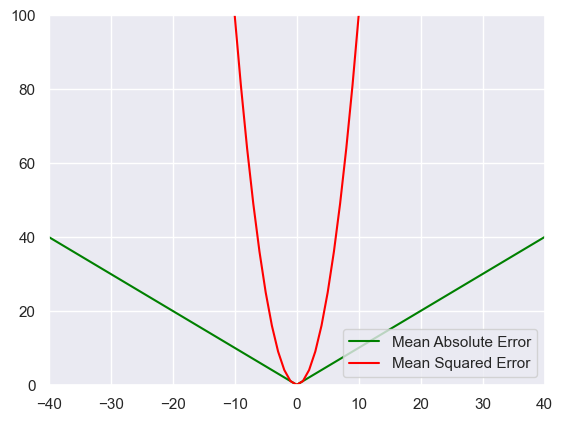

In [87]:
#MSE
y_mean_squared_error = np.square(x_axes)

plt.plot(x_axes, y_mean_absolute_error, "green", label="Mean Absolute Error")
plt.plot(x_axes, y_mean_squared_error, "red", label="Mean Squared Error")
plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-40, 40, 0, 100])
plt.show()

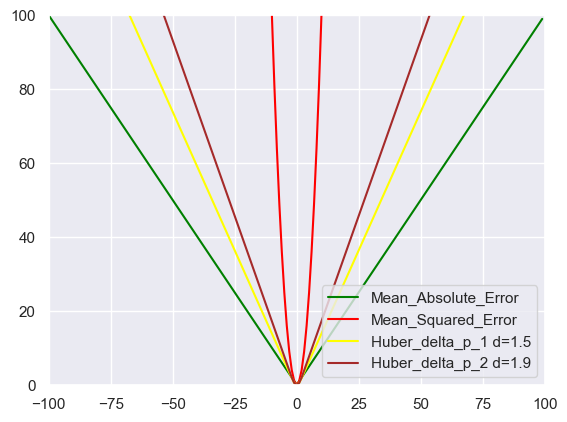

In [88]:
delta_p_1 = 1.5 #if delta=1 Huber loss = MAE. 
delta_p_2 = 1.9
mean_squared_e_huber = 0.5 * np.square(x_axes)
mean_absolute_e_huber1 = delta_p_1 * (np.abs(x_axes) - 0.5 * delta_p_1)
mean_absolute_e_huber2 = delta_p_2 * (np.abs(x_axes) - 0.5 * delta_p_2)
y_huber_first = np.where(np.abs(x_axes) <= delta_p_1, mean_squared_e_huber, mean_absolute_e_huber1)
y_huber_second = np.where(np.abs(x_axes) <= delta_p_1, mean_squared_e_huber, mean_absolute_e_huber2)

plt.plot(x_axes, y_mean_absolute_error, "green", label="Mean_Absolute_Error")
plt.plot(x_axes, y_mean_squared_error, "red", label="Mean_Squared_Error")
plt.plot(x_axes, y_huber_first, "yellow", label="Huber_delta_p_1 d=1.5")
plt.plot(x_axes, y_huber_second, "brown", label="Huber_delta_p_2 d=1.9")
plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-100, 100, 0, 100])
plt.show()




In [89]:
def huber_loss_function(y_pred, y_test, delta=2):
    huber_mean_squared_error = 0.5*(y_test-y_pred)**2
    huber_mean_absolute_error = delta * (np.abs(y_test - y_pred) - 0.5 * delta)
    return np.where(np.abs(y_test - y_pred) <= delta, huber_mean_squared_error, huber_mean_absolute_error)

huber_loss_function(y_pred, y_test)

array([8.20000000e+01, 3.75480000e+00, 7.81250000e-01, 5.10050000e-01,
       3.29347280e-01, 1.30000000e+01, 6.49404000e+01, 1.98800000e+01,
       2.97430000e+01, 6.59600000e+01, 1.71902000e+02, 6.80000000e+01,
       5.55198000e+01, 1.19800000e+01, 4.77324000e+01, 3.71400000e+01,
       3.73762000e+01, 1.76410000e+01, 2.32107000e+02, 2.78140000e+02,
       1.45458000e+02, 1.83855600e+02, 1.15600000e+01, 0.00000000e+00,
       1.66450000e+01, 1.39788000e+01, 1.20802000e+01, 4.20500000e-02,
       3.16613000e+02, 2.41608000e+01, 1.82322000e+02, 2.10000000e+01,
       2.66000000e+01, 2.31810000e+01, 1.66564800e+02, 1.01196000e+02,
       3.16000000e+01, 6.05000000e-01, 7.54540000e+01, 4.69965125e-01,
       2.68410000e+01, 2.35770000e+01, 9.24310000e+01, 6.11976000e+01,
       1.42408000e+02, 4.42778000e+01, 2.43590000e+01, 1.81430000e+01,
       2.50000000e+00, 8.06366000e+01, 8.95980000e+00, 8.00000000e-04,
       5.00000000e-03, 4.87920000e+00, 2.52994000e+01, 1.28198000e+01,
      

In [90]:
huber_mean_squared_error = 1/2*(y_test-y_pred)**2
huber_mean_squared_error



710     882.000000
666       4.139715
298       0.781250
356       0.510050
571       0.329347
          ...     
474    2377.471864
416     101.702322
10       63.067680
105     358.841334
68        0.288724
Name: Cost, Length: 302, dtype: float64

In [91]:
import statistics
kunal = statistics.mean(huber_mean_squared_error)
kunal

1142.0916694874406

In [92]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))


1.393709891399276

In [93]:
metrics.r2_score(y_test, y_pred)


0.9771561279372244

In [94]:
import warnings
warnings.filterwarnings('ignore')


In [95]:
#Hyperparameter Tuning

#Choose following method for hyperparameter tuning
#RandomizedSearchCV --> Fast
#GridSearchCV
#Assign hyperparameters in form of dictionery
#Fit the model
#Check best paramters and best score

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [1,3,5,7,10]
min_samples_leaf = [1, 2, 5, 10]

In [98]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [99]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regression_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)



In [100]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
#rf_random.best_params_

In [120]:

hot_tub_prediction =rf_random.predict(X_test)


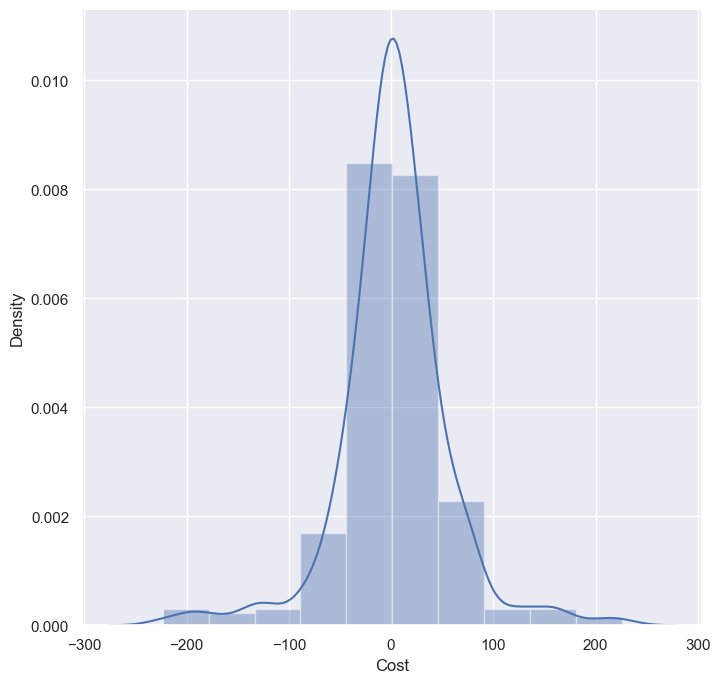

3.085785572618742

In [121]:
#plt.figure(figsize = (8,8))
#sns.distplot(y_test-hot_tub_prediction)

plt.figure(figsize = (8,8))
sns.distplot(y_test-hot_tub_prediction,bins=10)
plt.show()
(y_test-hot_tub_prediction).mean()




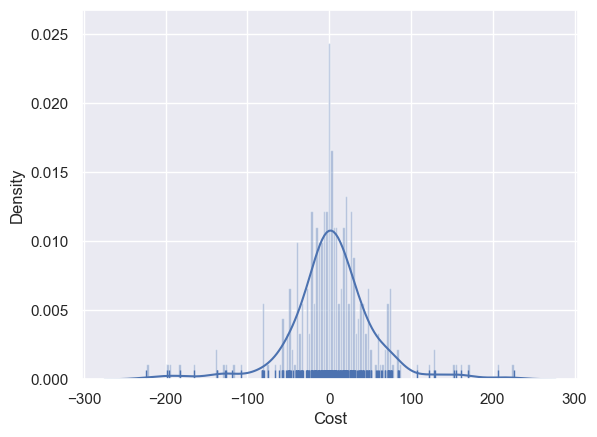

In [122]:
sns.distplot(y_test-hot_tub_prediction,bins=150,
    hist=True,
    kde=True,
    rug=True,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,)

plt.show()



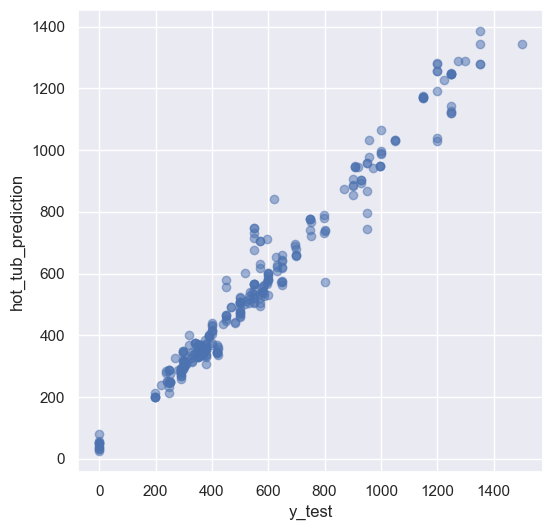

In [123]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, hot_tub_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("hot_tub_prediction")
plt.show()

In [124]:
print('Mean absolute E:', metrics.mean_absolute_error(y_test, hot_tub_prediction))
print('Mean squared E:', metrics.mean_squared_error(y_test, hot_tub_prediction))
print('Root mean squared E :', np.sqrt(metrics.mean_squared_error(y_test, hot_tub_prediction)))

Mean absolute E: 34.86473751258194
Mean squared E: 2858.5022702321507
Root mean squared E : 53.46496301534446


In [125]:
#Save the model to reuse it again

In [126]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(regression_rf, file)





In [127]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [128]:
tub_data_test.columns

Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_Date', 'Sell_month',
       'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono', 'Make_GSD',
       'Make_Mspa', 'Title_Bergen Four Person', 'Title_Bergen Six Person',
       'Title_Camaro Four Person', 'Title_Camaro Six Person',
       'Title_Carlton Six person', 'Title_Exotic Four Person',
       'Title_Exotic Six Person', 'Title_Lite Four Person',
       'Title_Lite six person', 'Title_Mono Six Person',
       'Title_Nest Two Person', 'Title_Otium Six Person',
       'Title_Ottomon Four Person', 'Title_Ottomon Six person',
       'Title_Rimba Six person', 'Title_Silver Cloud Four person',
       'Title_Silver Cloud Six Person', 'Title_Soho Six Person',
       'Title_Starry Six Person', 'Title_Tekapo Four person',
       'Title_Tekapo Six person', 'Title_Tuscany Six Person',
       'Title_Vito Six Person', 'Series_Comfort', 'Series_Delight',
       'Series_Frame', 'Series_Lite', 'Series_Muse', 'Series_Premium',
       'Se

In [129]:
tub_data_test.shape

(302, 42)

In [130]:
hot_tub_predcition = forest.predict(tub_data_test)
import pandas as pd
df=pd.DataFrame(hot_tub_predcition)

writer = pd.ExcelWriter('/Users/kunaldeshpande/Desktop/29092022rand.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='AnotherSheet')

writer.save()

In [131]:
X_test

,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
710,6.0,3.0,1,5,22,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
666,4.0,4.0,1,3,22,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
298,6.0,5.0,1,3,28,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
356,4.0,2.0,1,3,29,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
571,6.0,3.0,3,5,23,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,6.0,5.0,3,3,1,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,4.0,3.0,1,3,30,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
10,6.0,3.0,3,5,23,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105,6.0,5.0,1,3,24,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [132]:
metrics.r2_score(y_test,hot_tub_prediction)

0.9714124260350999

In [133]:
len(hot_tub_prediction)

302

In [134]:
def huber_loss(y_test,hot_tub_prediction,delta=1.5):
    huber_mean_squared_error = 0.5*(y_test-hot_tub_prediction)**2
    huber_mean_absolute_error = delta * (np.abs(y_test - hot_tub_prediction) - 0.5 * delta)
    return np.where(np.abs(y_test - hot_tub_prediction) <= delta, huber_mean_squared_error, huber_mean_absolute_error)

huber_loss(y_test,hot_tub_prediction).mean()

51.214141833388396

In [135]:
huber_mean_squared_error2 = 1/2*(y_test-hot_tub_prediction)**2

In [136]:
import statistics
kunal = statistics.mean(huber_mean_squared_error2)
kunal

1429.2511351160756

In [137]:
np.sqrt(kunal)

37.80543790403803